<a href="https://www.kaggle.com/code/themeeemul/simple-heart-disease-classification-using-xgboost?scriptVersionId=133529110" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib as mpl
from matplotlib.ticker import NullFormatter

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease/heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
missing = []
unique = []
types = []
variables = []
count = []

for item in df.columns:
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))
    
output = pd.DataFrame({
    'variable': variables, 
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})   
output.sort_values("missing",ascending=False).reset_index(drop=True)

,variable,dtype,count,unique,missing
0,age,int64,1190,50,0
1,sex,int64,1190,2,0
2,chest pain type,int64,1190,4,0
3,resting bp s,int64,1190,67,0
4,cholesterol,int64,1190,222,0
5,fasting blood sugar,int64,1190,2,0
6,resting ecg,int64,1190,3,0
7,max heart rate,int64,1190,119,0
8,exercise angina,int64,1190,2,0
9,oldpeak,float64,1190,53,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


<Axes: >

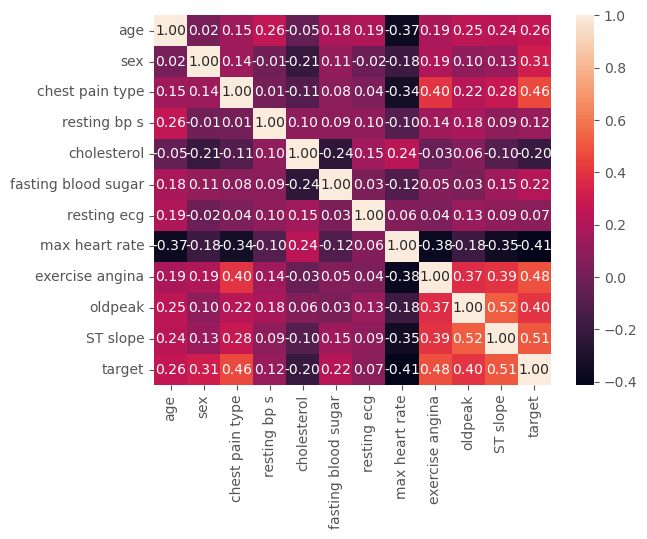

In [6]:
# Let's take a look for the features correlation.
corr = df.corr()
sns.heatmap(corr,fmt='.2f',annot=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize,LabelEncoder
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import  mean_squared_error,mean_absolute_error, accuracy_score

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


In [8]:
X = df.drop(columns=['target']).values
y = df['target'].values

print("Len of dataset = ", len(y))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=42)
print("Y_train shape",len(y_train))
print("Y_test shape",len(y_test))
print("Y_val shape",len(y_val))

Len of dataset =  1190
Y_train shape 583
Y_test shape 357
Y_val shape 250


In [9]:
def classification_metrics(y_test,y_pred):
    print("Acc:\t",round( accuracy_score(y_test,y_pred),4))
    return round(  accuracy_score(y_test,y_pred),4)

In [10]:
def model_evaluate(model, param_grid, x_train, y_train, x_test,y_test, model_name, k_folds=4, scoring='accuracy', fit_parameters={}):
    model_cv = GridSearchCV(model, param_grid, cv=k_folds, verbose=False, scoring= scoring)
    model_cv.fit(x_train, y_train, **fit_parameters)
    y_train_pred = model_cv.predict(x_train)
    y_test_pred = model_cv.predict(x_test)

    print("Training metrics:")
    training_mae = classification_metrics(y_train ,y_train_pred)
    print("\nTesting metrics:")
    testing_mae = classification_metrics(y_test ,y_test_pred)
    
    print('best parameters')
    print (model_cv.best_params_)


    return model_cv

In [11]:
# If you want to run fully the grid search 
# xgb_parameters = {
#     'booster': ['gbtree'],
#     'tree_method': ['hist'],
#     'gamma': [0.1, 0.5, 1.0],
#     'reg_alpha': [0.0, 0.5, 1.0],
#     'eta': [0.01, 0.03, 0.05],
#     'reg_lambda': [0.00001, 0.0001, 0.001],
#     'colsample_bytree': [0.6, 0.75, 0.9],
#     'min_child_weight': [20, 40, 60],
#     'n_estimators': [500, 1000, 1500],
#     'seed': [42],
#     'max_depth': [5, 7, 9],
# }
xgb_parameters = {'booster': ['gbtree'],
 'colsample_bytree': [0.75], 
 'eta': [0.01], 'gamma': [0.5], 
 'max_depth': [5], 
 'min_child_weight': [20], 
 'n_estimators': [1000], 
 'reg_alpha': [0.5], 
 'reg_lambda': [0.001],
 'seed': [42],
 'tree_method': ['hist']}

xgb_model = xgb.XGBClassifier()
model = model_evaluate(xgb_model, xgb_parameters, X_train, y_train, X_test, y_test, 'XGB',
                           fit_parameters={'eval_set':[(X_val, y_val)], 
                                           'early_stopping_rounds':100,'verbose':0,'eval_metric':'auc'})


Training metrics:
Acc:	 0.8542

Testing metrics:
Acc:	 0.8796
best parameters
{'booster': 'gbtree', 'colsample_bytree': 0.75, 'eta': 0.01, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 20, 'n_estimators': 1000, 'reg_alpha': 0.5, 'reg_lambda': 0.001, 'seed': 42, 'tree_method': 'hist'}


In [12]:
y_pred = model.predict(X_test)
print("Test accuracy")
classification_metrics(y_pred,y_test)

Test accuracy
Acc:	 0.8796


0.8796